# Rubric
|평가문항	|상세기준| 내 평가|
|--|--|--|
|1. AirPassengers 데이터셋을 통해 전처리 과정을 체계적으로 진행하였다.|각 학습 단계별 전처리 과정 중 로그 변환 및 차분 분석을 통해</br> ACF, PACF plot을 시각화하고 결과값이 제대로 출력되었는지 확인하였다.|
|2. AutoARIMA의 적용 및 결과를 확인하였는가?|AutoARIMA를 실행하여 Best model 결과를 확인하고</br> ARIMA 수식에서 나오는 p,d,q 및 지표의 AIC, Time을 통해 선정 이유를 분석해본다.|
|3. ARCH 모델이 제대로 작동하는지 확인하고 결과를 분석했는가?|데이터를 ARCH 모델에 적합하고 </br>나온 지표와 시각화된 결과를 통해 어떤 유의미한 결과를 얻었는지 설명할 수 있다.|

- 용어 설명  

|용어|	설명|
|--|--|
|모수(Population Parameter)	|본인이 알고 싶은 대상 또는 전체 혹은 집단을 말하며 여기서는 데이터 셋을 의미합니다.|
|점추정(Point Estimation)	|데이터셋의 분포(데이터셋에서 각 데이터의 퍼짐 정도)에 대하여 가장 근사한 단일 값을 추정하는 것입니다.</br> 모집단의 특성을 단일한 값으로 추정하는 것과 같은 말입니다.|
|구간추정(Interval Estimation)|	모수가 있을만한 구간(예상 범위)을 정하고 모수가 실제로 정해놓은 구간에 있을 확률을 구하는 것입니다.|
|신뢰수준(Confidence Level)|	주로 95%와 99%를 사용하며 신뢰구간에서 모수가 포함되는 것을 어느정도 신뢰할 수 있는지를 나타낸 것입니다.|
|신뢰구간(Confidence Interval)|	모수가 어느범위 내에 있는지 확률적으로 보여주는 것이며 전체가 아닌 샘플링된(일부) 데이터에서 모수의 범위를 찾기 위해서 사용합니다. </br>샘플링된 데이터가 전체 데이터를 얼마나 잘 대표할 수 있는지를 측정할 수 있습니다.|
|이분산성(Heteroskedasticity)|	독립변수의 값 마다 오차항의 분산이 일정하지 않은 경우를 의미합니다.|
|조건부 이분산성(Conditional Heteroskedasticity)|	독립변수와 오차항이 상관관계가 있는 경우를 의미합니다.|
|무조건부 이분산성(Unconditional Heteroskedasticity)|	독립변수와 오차항이 상관관계가 없는 경우를 의미합니다.|
|표준화된 잔차(Standardized Residuals)|	잔차는 관측값 - 예측값을 말하며 표준화된 잔차는 여러 잔차들을 표준화하여 나온 값입니다. 잔차들중에 이상치(Outlier)가 없는지 판별할 수 있습니다.|
|조건부 분산(Conditional Volatility)|	예측의 불확실성을 뜻하며 예측으로 얼마나 맞출 수 없는가에 대한 범위를 말합니다.|  

</br> </br>

- 미니프로젝트의 목표!
    - Objective 1: 직접 ARIMA를 통해 시계열 예측을 수행해보자!

    - Objective 2: 직접 ARCH를 통해 S&P500의 변동성을 모델링하자!
</br> </br>
- 미니 프로젝트 목차  
        ① 데이터 연결하기  
        ② ARIMA 실습해보기!  
        ③ 데이터 확인하기  
        ④ 분산을 일정하게 만들기 - log transformation  
        ⑤ 차분을 통해 분석하기  
        ⑥ Auto ARIMA 적용 및 결과 확인  
        ⑦ ARCH 모델 실습해보기  

# Objective 1
- air passenger => ARIMA

##1-1 Import Library & Data

In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.5/920.5 kB 14.1 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/aiffel/Time_series(7주차)/data/'
ap = pd.read_csv(path+'AirPassengers.csv')
ap

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


##1-2 Preprocessing

In [ ]:
#delete 'Month'
ap.drop('Month', axis = 1, inplace = True)
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


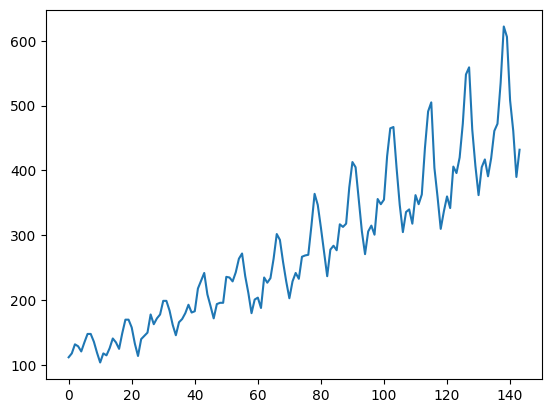

In [ ]:
plt.plot(ap)
plt.show()

In [ ]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


[]

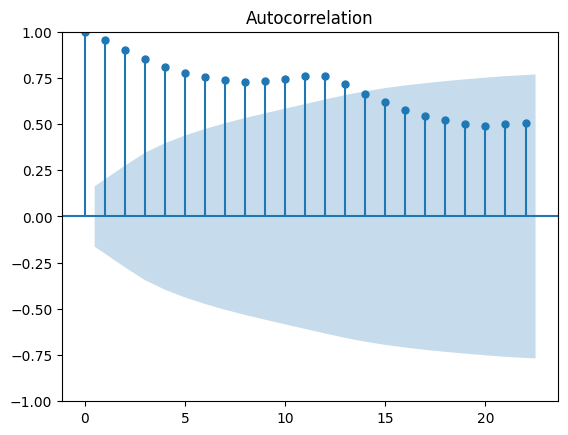

In [ ]:
plot_acf(ap_transformed) # acf plot, 점차 감소하는 모양새를 지니고 있음 , 차분이 필요함. 
plt.plot()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

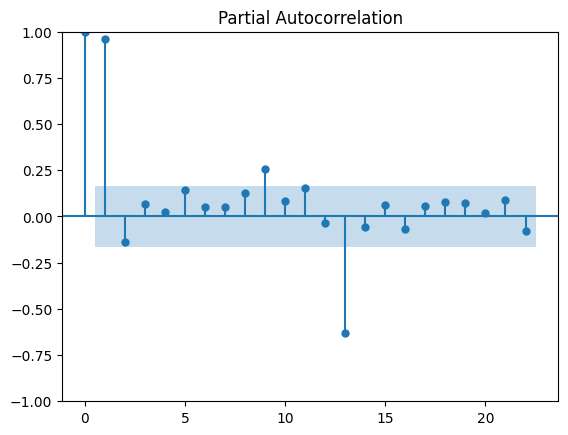

In [ ]:
plot_pacf(ap_transformed) # pacf plot, lag 1까지 유의미한 결과를 보임 AR 특성을 가짐. airma를 사용한다면 p=1
plt.plot()

In [ ]:
#differencing
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

[]

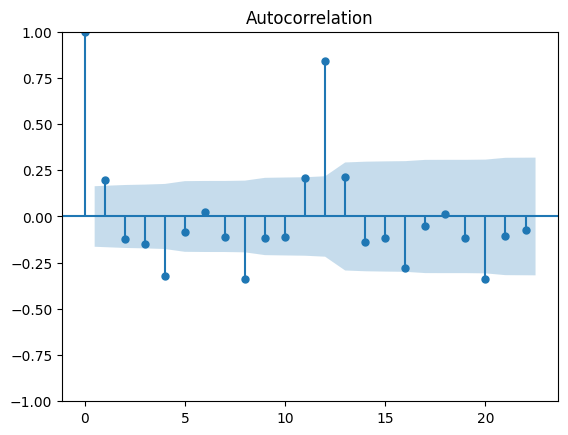

In [ ]:
# lag 0과 lag 12에서 유의미한 lag가 포착됨 => seasonal 
plot_acf(ap_diff)
plt.plot()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

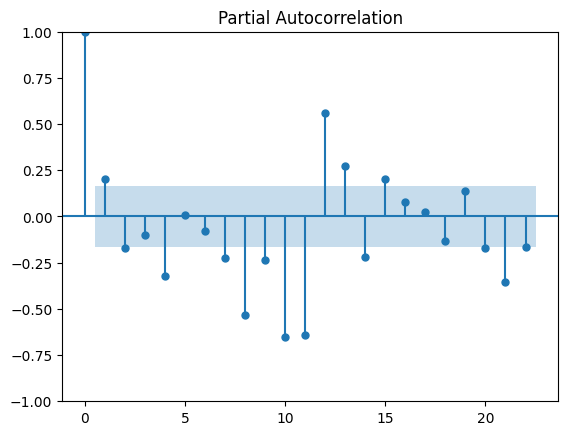

In [ ]:
plot_pacf(ap_diff)
plt.plot()

In [ ]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


##1-3 Split

In [ ]:
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]
# train과 test를 랜덤으로 뽑지 않고 앞 뒤고 잘라 분리함. 이것은 시계열이라 시간의 순서가 중요하기 때문에 

##1-4 Machine Learning
- AutoARIMA 내부 인자의 의미를 알아봅시다.  
    - seasonal : False인 경우 non-seasonal model로 제한합니다.
    - suppress_warnings : ARIMA를 실행하면 생기는 에러문구가 나오지 않도록 해줍니다.
    - trace : True일 때 오류(error)가 발생하면 일부 내용을 출력합니다.
    - max_D : seasonal의 최대 값을 설정할 수 있습니다.

In [ ]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12  SARIMA
# 시즈널이 나왔다고 차분을 수동으로 하지 않고 모델에서 직접할 수 있군 여기서 1번만 했는데 대부분 1번만 하면 충분...
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) 
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.916, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.555, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-214.724, Time=0.52 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.097, Time=1.17 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.61 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.339, Time=1.48 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=1.24 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.826, Time=0.93 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

- Best model: ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.339, Time=0.70 sec
    - AIC 값이 가장 작다. = 모형의 적합도가 높다. 
    - p : 자기 회귀 부분의 차수 차분한 값의 PACF를 볼 때 값이 급격히 떨어진 지점. 그래프를 보면 p=1인데 여기는 5가 나옴. 
    - d : 차분이 포함된 정도. 예측 구간에 영향을 준다. d가 클수록 예측 구간의 크기가 급격하게 늘어난다. 대부분 1차 차분이면 충분하다 함. 
    - q : 이동 평균 부분의 차수 ACF의 값이 급격히 떨어진 지점. AR과 MA 둘 중의 하나의 특성만 가진다고 했다 그럼 여기는 0이어야 하는 거 아님?

- 그래프를 통해 결정한 p,d,q는 1,1,0임 AIC = -191.035



In [ ]:
result = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 
result

(115    6.202988
 116    6.170074
 117    6.119401
 118    6.051822
 119    6.019914
 120    6.016473
 121    6.042797
 122    6.084070
 123    6.129736
 124    6.163914
 125    6.185198
 126    6.191376
 127    6.189418
 128    6.184415
 129    6.183275
 130    6.188062
 131    6.199918
 132    6.216198
 133    6.234469
 134    6.251537
 135    6.266014
 136    6.277226
 137    6.286108
 138    6.293796
 139    6.301762
 140    6.310814
 141    6.321357
 142    6.333089
 143    6.345500
 dtype: float64,
 array([[6.03833663, 6.36763871],
        [5.94122176, 6.39892679],
        [5.87655504, 6.36224761],
        [5.80268547, 6.30095904],
        [5.77043354, 6.26939364],
        [5.76254989, 6.27039606],
        [5.78307995, 6.3025145 ],
        [5.82162229, 6.34651871],
        [5.86684138, 6.39263138],
        [5.90059608, 6.4272327 ],
        [5.92003911, 6.45035758],
        [5.92339221, 6.45936047],
        [5.91939415, 6.45944196],
        [5.91344462, 6.45538514],
        [5.912

In [ ]:
# confidence interval까지 도출 구간 예측
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------
115    6.202988
116    6.170074
117    6.119401
118    6.051822
119    6.019914
120    6.016473
121    6.042797
122    6.084070
123    6.129736
124    6.163914
125    6.185198
126    6.191376
127    6.189418
128    6.184415
129    6.183275
130    6.188062
131    6.199918
132    6.216198
133    6.234469
134    6.251537
135    6.266014
136    6.277226
137    6.286108
138    6.293796
139    6.301762
140    6.310814
141    6.321357
142    6.333089
143    6.345500
dtype: float64
--------------------------------------------------------------------------------
[[6.03833663 6.36763871]
 [5.94122176 6.39892679]
 [5.87655504 6.36224761]
 [5.80268547 6.30095904]
 [5.77043354 6.26939364]
 [5.76254989 6.27039606]
 [5.78307995 6.3025145 ]
 [5.82162229 6.34651871]
 [5.86684138 6.3926

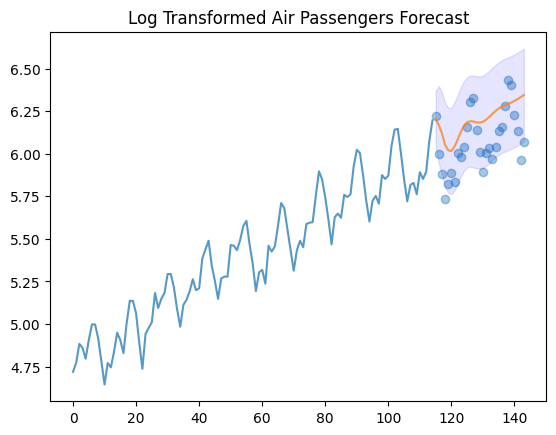

In [ ]:
# 예측 성능을 시각화합니다. 
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다.

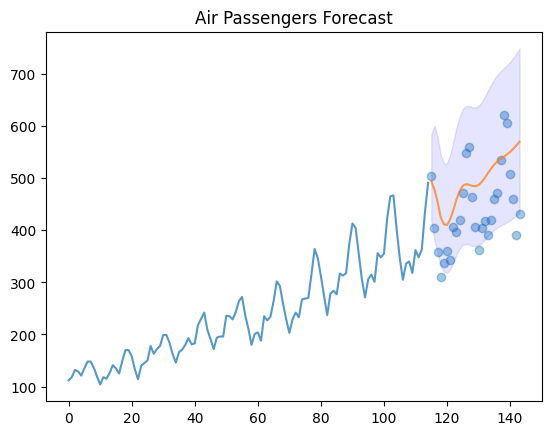

In [ ]:
#로그 트랜스폼 했던 거 되돌리기 
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
ap_train = np.exp(ap_transformed_train)
ap_test = np.exp(ap_transformed_test)
preds_exp = np.exp(preds)
conf_int_exp = np.exp(conf_int)

plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds_exp, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds_exp.shape[0]:],
                 conf_int_exp[:, 0], conf_int_exp[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다
# 원래 그래프 모양이랑 같아졌다. 
# 데이터가 예측한 값 사이에 들어있다 잘 맞는 예측 모델임. 

#Objective 2
- sp500 => ARCH

##2-1 Import Library & Data

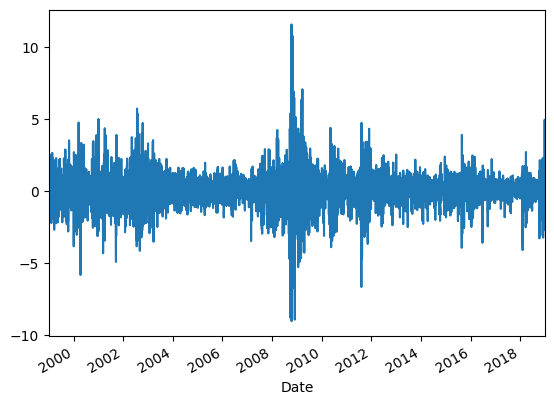

In [ ]:
# ⑦-1 : 데이터 및 라이브러리 불러오기 
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다. 
plt.show()
#강의에서 언급한 바와 같이, 조건부 이분산성(Conditional Heteroskedasticity)이 나타남. 
#삐쭉삐죽 튀어나온 부분이 조건부 이분산성이 나타난 부위인데 2008과 2009 사이의 큰 삐쭉이는 모기지 금융위기 때임. 

In [ ]:
# ⑦-3 : ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

# ⑦-4 : 지표를 통한 결과 확인
print(res.summary())
# 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악

# 자동적으로 GARCH 모델에 적합되는 것을 확인할 수 있습니다.
#AIC, BIC 모두 낮을수록 적합도가 좋음.
# volatility model
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value(p>|t|)를 통해 신뢰도 99%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Wed, Apr 12 2023   Df Residuals:                     5029
Time:         

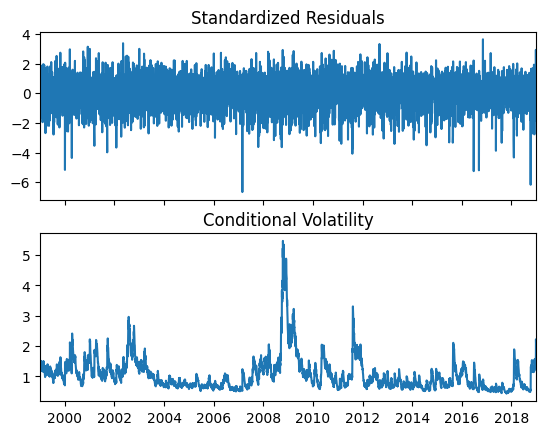

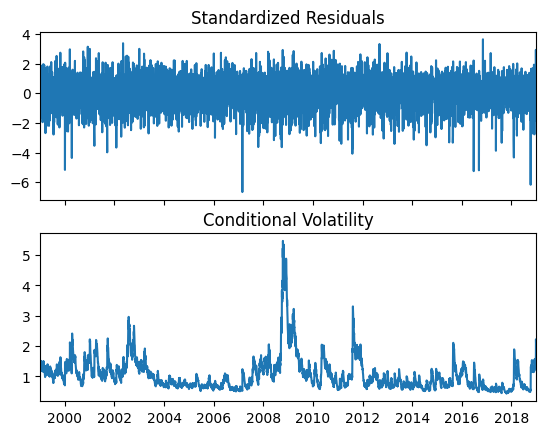

In [ ]:
# ⑦-5 : 시각화를 통한 결과값 확인. 조건성 이분산성을 보이는 것이 없음. => 모델 적합이 좋다. 
res.plot()